## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  91.658039  1406.736124  0.333714  1.967378  478.193746
1  35.012427  1736.883248  0.380642  7.391483  662.022591
2  55.545557   741.769697  0.788903  8.250179  587.836085
3  58.180035   434.659728  0.112128  8.610022   75.981713
4  15.837312  1016.090926  0.246422  2.299793  251.029980


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0324506	total: 57.3ms	remaining: 57.3s
1:	learn: 1.0219806	total: 57.9ms	remaining: 28.9s
2:	learn: 1.0109623	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9980369	total: 58.9ms	remaining: 14.7s
4:	learn: 0.9855838	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9750255	total: 59.7ms	remaining: 9.9s
6:	learn: 0.9629413	total: 60.1ms	remaining: 8.53s
7:	learn: 0.9523455	total: 60.6ms	remaining: 7.51s
8:	learn: 0.9402878	total: 61.1ms	remaining: 6.72s
9:	learn: 0.9271373	total: 61.6ms	remaining: 6.1s
10:	learn: 0.9170192	total: 62.1ms	remaining: 5.58s
11:	learn: 0.9032202	total: 62.5ms	remaining: 5.14s
12:	learn: 0.8923005	total: 63ms	remaining: 4.79s
13:	learn: 0.8804405	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8693325	total: 64ms	remaining: 4.2s
15:	learn: 0.8589362	total: 64.3ms	remaining: 3.95s
16:	learn: 0.8499706	total: 64.7ms	remaining: 3.74s
17:	learn: 0.8405537	total: 65.1ms	remaining: 3.55s
18:	learn: 0.8331994	total: 65.4ms	remaining: 3.38s

122:	learn: 0.2586678	total: 108ms	remaining: 773ms
123:	learn: 0.2555813	total: 109ms	remaining: 769ms
124:	learn: 0.2533801	total: 109ms	remaining: 765ms
125:	learn: 0.2502705	total: 110ms	remaining: 762ms
126:	learn: 0.2473841	total: 110ms	remaining: 758ms
127:	learn: 0.2450185	total: 111ms	remaining: 755ms
128:	learn: 0.2425378	total: 111ms	remaining: 752ms
129:	learn: 0.2401655	total: 112ms	remaining: 749ms
130:	learn: 0.2379273	total: 112ms	remaining: 745ms
131:	learn: 0.2353849	total: 113ms	remaining: 740ms
132:	learn: 0.2336113	total: 113ms	remaining: 737ms
133:	learn: 0.2314185	total: 114ms	remaining: 734ms
134:	learn: 0.2281927	total: 114ms	remaining: 730ms
135:	learn: 0.2258027	total: 114ms	remaining: 726ms
136:	learn: 0.2238910	total: 115ms	remaining: 723ms
137:	learn: 0.2217833	total: 115ms	remaining: 719ms
138:	learn: 0.2195177	total: 116ms	remaining: 716ms
139:	learn: 0.2173833	total: 116ms	remaining: 713ms
140:	learn: 0.2145982	total: 116ms	remaining: 709ms
141:	learn: 

294:	learn: 0.0665775	total: 185ms	remaining: 442ms
295:	learn: 0.0662358	total: 185ms	remaining: 441ms
296:	learn: 0.0658861	total: 186ms	remaining: 440ms
297:	learn: 0.0655060	total: 186ms	remaining: 438ms
298:	learn: 0.0651225	total: 187ms	remaining: 437ms
299:	learn: 0.0648446	total: 187ms	remaining: 436ms
300:	learn: 0.0645015	total: 187ms	remaining: 435ms
301:	learn: 0.0641679	total: 188ms	remaining: 434ms
302:	learn: 0.0637840	total: 188ms	remaining: 433ms
303:	learn: 0.0634787	total: 189ms	remaining: 432ms
304:	learn: 0.0631427	total: 189ms	remaining: 431ms
305:	learn: 0.0628600	total: 190ms	remaining: 430ms
306:	learn: 0.0626335	total: 190ms	remaining: 429ms
307:	learn: 0.0622946	total: 190ms	remaining: 428ms
308:	learn: 0.0619121	total: 191ms	remaining: 427ms
309:	learn: 0.0615975	total: 191ms	remaining: 426ms
310:	learn: 0.0613621	total: 192ms	remaining: 425ms
311:	learn: 0.0610623	total: 192ms	remaining: 424ms
312:	learn: 0.0607267	total: 193ms	remaining: 424ms
313:	learn: 

497:	learn: 0.0268962	total: 273ms	remaining: 275ms
498:	learn: 0.0267798	total: 274ms	remaining: 275ms
499:	learn: 0.0267292	total: 274ms	remaining: 274ms
500:	learn: 0.0266136	total: 275ms	remaining: 274ms
501:	learn: 0.0265640	total: 275ms	remaining: 273ms
502:	learn: 0.0264334	total: 276ms	remaining: 272ms
503:	learn: 0.0263847	total: 276ms	remaining: 272ms
504:	learn: 0.0262496	total: 277ms	remaining: 271ms
505:	learn: 0.0262036	total: 277ms	remaining: 270ms
506:	learn: 0.0261581	total: 277ms	remaining: 270ms
507:	learn: 0.0260480	total: 278ms	remaining: 269ms
508:	learn: 0.0260035	total: 278ms	remaining: 268ms
509:	learn: 0.0258741	total: 279ms	remaining: 268ms
510:	learn: 0.0257489	total: 279ms	remaining: 267ms
511:	learn: 0.0257033	total: 280ms	remaining: 267ms
512:	learn: 0.0255749	total: 280ms	remaining: 266ms
513:	learn: 0.0255301	total: 281ms	remaining: 265ms
514:	learn: 0.0254878	total: 281ms	remaining: 265ms
515:	learn: 0.0253831	total: 282ms	remaining: 264ms
516:	learn: 

666:	learn: 0.0131140	total: 350ms	remaining: 175ms
667:	learn: 0.0130612	total: 351ms	remaining: 174ms
668:	learn: 0.0130200	total: 351ms	remaining: 174ms
669:	learn: 0.0129701	total: 352ms	remaining: 173ms
670:	learn: 0.0129358	total: 352ms	remaining: 173ms
671:	learn: 0.0128863	total: 353ms	remaining: 172ms
672:	learn: 0.0128354	total: 353ms	remaining: 171ms
673:	learn: 0.0127651	total: 353ms	remaining: 171ms
674:	learn: 0.0127204	total: 354ms	remaining: 170ms
675:	learn: 0.0126764	total: 354ms	remaining: 170ms
676:	learn: 0.0126295	total: 355ms	remaining: 169ms
677:	learn: 0.0125912	total: 355ms	remaining: 169ms
678:	learn: 0.0125485	total: 355ms	remaining: 168ms
679:	learn: 0.0125022	total: 356ms	remaining: 167ms
680:	learn: 0.0124531	total: 356ms	remaining: 167ms
681:	learn: 0.0123859	total: 357ms	remaining: 166ms
682:	learn: 0.0123446	total: 357ms	remaining: 166ms
683:	learn: 0.0123040	total: 358ms	remaining: 165ms
684:	learn: 0.0122604	total: 358ms	remaining: 165ms
685:	learn: 

870:	learn: 0.0064709	total: 440ms	remaining: 65.1ms
871:	learn: 0.0064665	total: 440ms	remaining: 64.6ms
872:	learn: 0.0064577	total: 441ms	remaining: 64.1ms
873:	learn: 0.0064534	total: 441ms	remaining: 63.6ms
874:	learn: 0.0064236	total: 441ms	remaining: 63.1ms
875:	learn: 0.0063960	total: 442ms	remaining: 62.6ms
876:	learn: 0.0063818	total: 442ms	remaining: 62ms
877:	learn: 0.0063733	total: 443ms	remaining: 61.5ms
878:	learn: 0.0063690	total: 443ms	remaining: 61ms
879:	learn: 0.0063648	total: 444ms	remaining: 60.5ms
880:	learn: 0.0063551	total: 444ms	remaining: 60ms
881:	learn: 0.0063412	total: 445ms	remaining: 59.5ms
882:	learn: 0.0063329	total: 445ms	remaining: 58.9ms
883:	learn: 0.0063115	total: 445ms	remaining: 58.4ms
884:	learn: 0.0063073	total: 446ms	remaining: 57.9ms
885:	learn: 0.0062932	total: 446ms	remaining: 57.4ms
886:	learn: 0.0062790	total: 447ms	remaining: 56.9ms
887:	learn: 0.0062656	total: 447ms	remaining: 56.4ms
888:	learn: 0.0062518	total: 447ms	remaining: 55.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

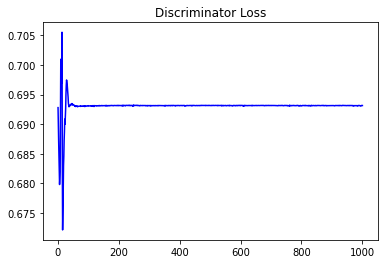

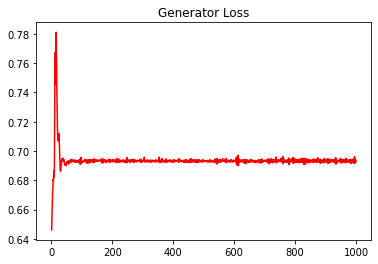

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.005351872542600492


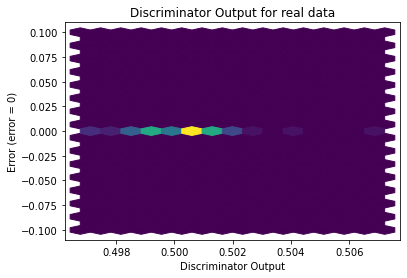

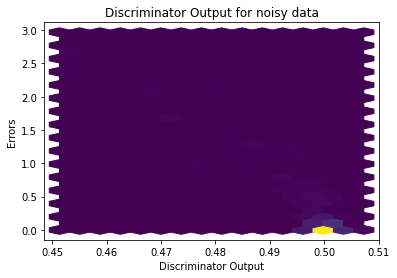

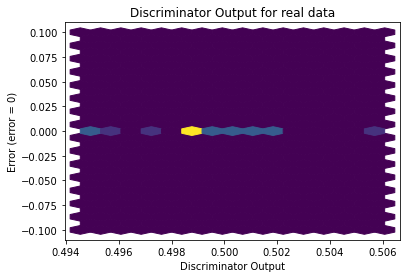

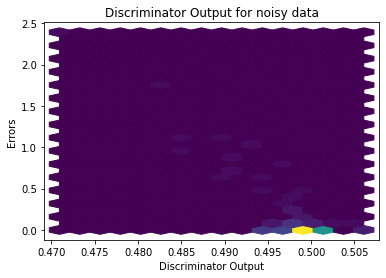

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


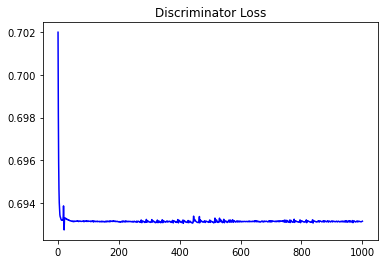

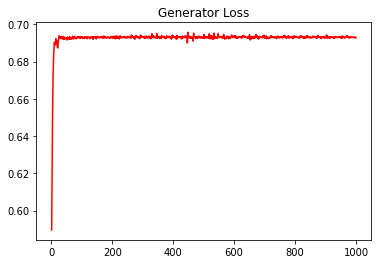

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.008501071448950586


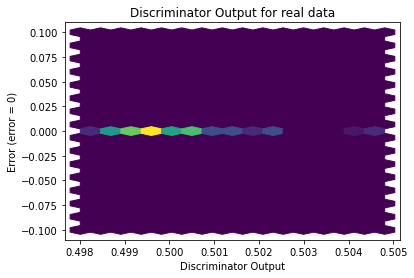

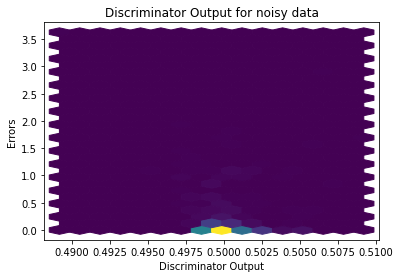

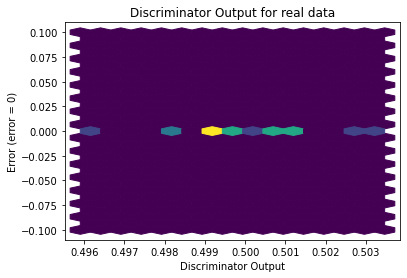

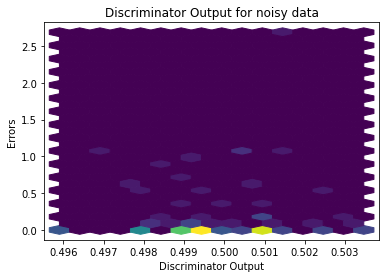

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0166]], requires_grad=True)
